In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Today, I will analyze Zomato's restaurant dataset to find meaningful insights

### @ I will answer questions such as:
####   +) Do more restaurants provide online delivery compared to offline services?
####   +) Which types of restaurants are most favored by the general public?
####   +) What price range do couples prefer for dinning out?

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#### Step 1: Loading dataset

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Data Science Projects/Machine Learning Projects/Zomato_Annalys/Zomato-data-.csv')
data.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


#### Step 2: Data cleaning and Preparation

##### I need convert the rate column to float number by removing denominator characters

In [6]:
def processing_rate(value_rate):
  value_rate = str(value_rate).split('/')
  value_rate = value_rate[0]

  return float(value_rate)

data['rate'] = data['rate'].apply(processing_rate)
data.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


##### => There is no null value in my data

#### Step 3: Exploring Restaurant types

Text(0.5, 0, 'Type of restaurant')

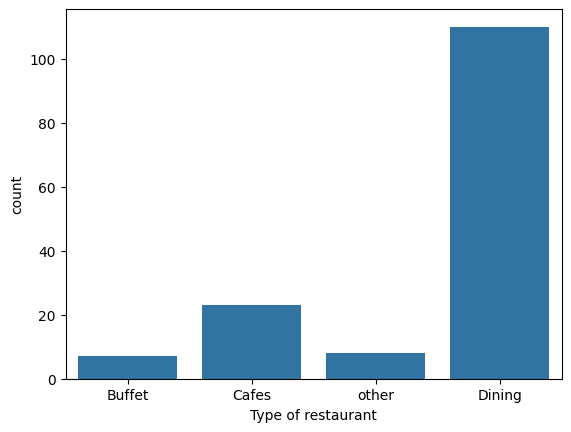

In [8]:
sns.countplot(x=data['listed_in(type)'])
plt.xlabel('Type of restaurant')

Text(0, 0.5, 'Votes')

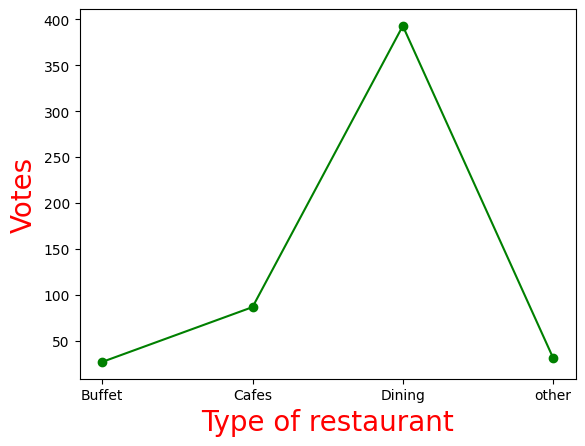

In [14]:
grouped_data = data.groupby('listed_in(type)')['rate'].sum()
result = pd.DataFrame({'votes' : grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant', c='red', size=20)
plt.ylabel('Votes', c='red', size=20)

#### Step 4: Identify the most voted restaurant

In [16]:
max_votes = data['votes'].max()
restaurant_with_max_votes = data.loc[data['votes'] == max_votes,'name']

print('Restaurants with the maximum votes: ')
print(restaurant_with_max_votes)

Restaurants with the maximum votes: 
38    Empire Restaurant
Name: name, dtype: object


#### Step 5: Online order availability

<Axes: xlabel='online_order', ylabel='count'>

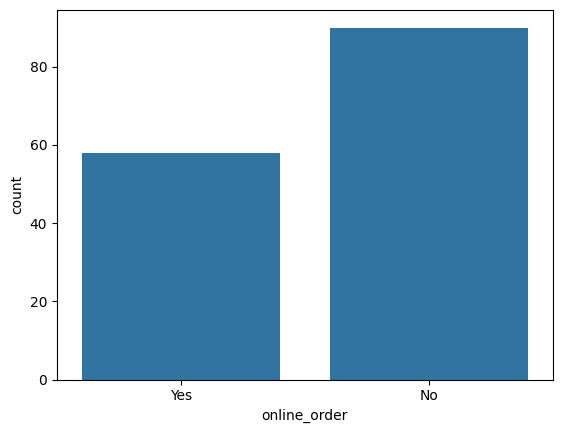

In [17]:
sns.countplot(x=data['online_order'])

##### => This suggests that a majority of the restaurants do not accept online order

#### Step 6: Analyze ratings

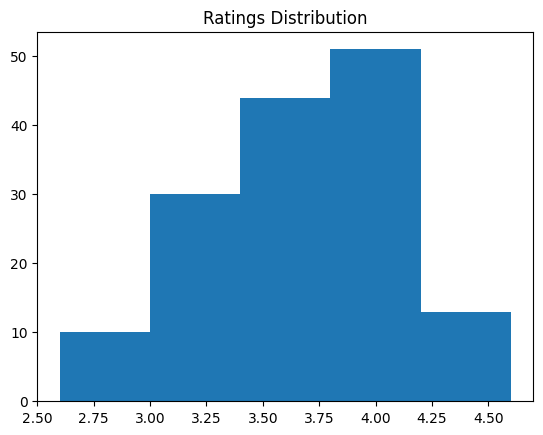

In [18]:
plt.hist(data['rate'], bins=5)
plt.title('Ratings Distribution')
plt.show()

##### => The majority of restaurants received ratings ranging from 3.5 to 4.0

#### Step 7: Approximate cost for couples

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

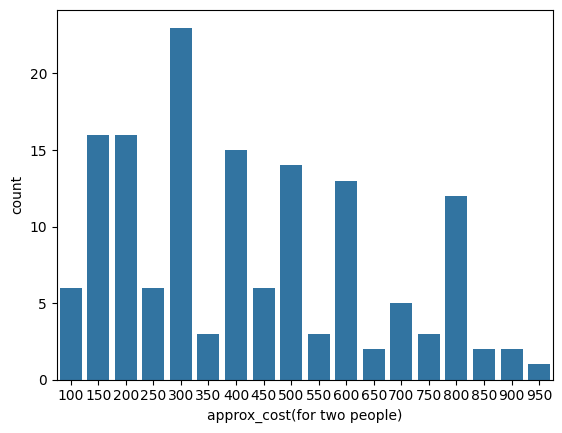

In [19]:
couple_data = data['approx_cost(for two people)']
sns.countplot(x=couple_data)

##### => The majority of couples prefer restaurants with an approximate cost of 300 rupees

#### Step 8: Ratings comparison-online and offiline orders

<Axes: xlabel='online_order', ylabel='rate'>

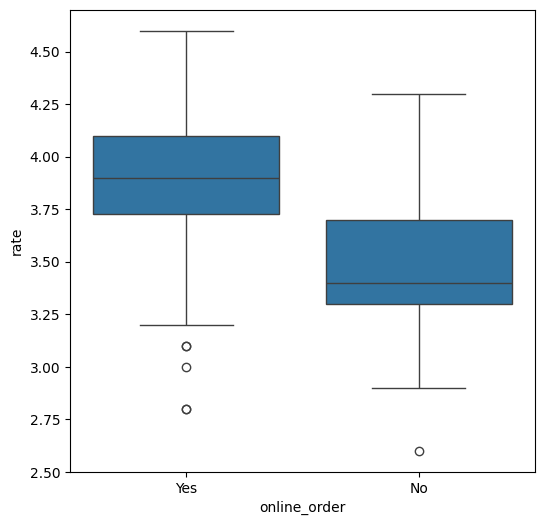

In [21]:
plt.figure(figsize = (6,6))
sns.boxplot(x='online_order', y='rate', data=data)

##### => Offline orders received lower ratings in comparison to online orders which obtained excellent ratings

#### Step 9: Order mode preferences by restaurant type

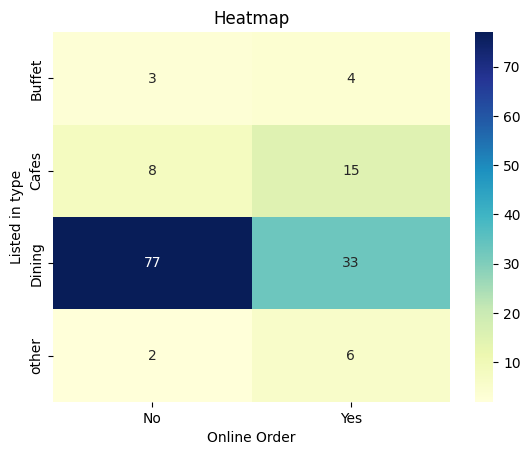

In [22]:
pivot_table = data.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed in type')
plt.show()

In [23]:
pivot_table

online_order,No,Yes
listed_in(type),,
Buffet,3,4
Cafes,8,15
Dining,77,33
other,2,6


##### => Dining restaurants primarily accept offline orders whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants but prefer online ordering at cafes

In [29]:
data['name'].value_counts()

,count
name,
San Churro Cafe,2
Onesta,2
CAFE NOVA,2
Addhuri Udupi Bhojana,1
Jalsa,1
...,...
Melting Melodies,1
New Indraprasta,1
Anna Kuteera,1
